In [8]:
import matplotlib
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # default library for making plots
import seaborn as sns # for making prettier plots!
import datetime
import math

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) # to see all columns in the pd dataframe
%config InlineBackend.figure_format = 'retina' # for the crispier version of plots for retina screens

matplotlib.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12.0, 6.0]

In [45]:
filename = 'data/database_main.xls'

data = pd.read_excel(filename, sheet_name="main", converters= {'Date': pd.to_datetime})
data.set_index(pd.to_datetime(data.Date),inplace=True)

print("Loaded db successfully!")

Loaded db successfully!


In [46]:
dayCodes = ['', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
minDayCodes = ['', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

days = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def is_nan(x):
    return (x is np.nan or x != x)

def defineSleepBucket(row):
    sleepEntry = row['Sleep Start time']
    if not is_nan(sleepEntry):
        sleepTimeO = datetime.datetime.strptime(sleepEntry, '%Y-%m-%dT%H:%M:%S.000').time()        
        if sleepTimeO.minute > 30:
            return (sleepTimeO.hour + 1)
            #return '{}:{}'.format(str((sleepTimeO.hour + 1)), '00')
        elif sleepTimeO.minute > 0:
            return sleepTimeO.hour + 0.5
            #return '{}:{}'.format(str(sleepTimeO.hour), ':30')
    else:
        return np.nan
    
def defineAwakeBucket(row):
    awakeEntry = row['Sleep End time']
    if not is_nan(awakeEntry):
        awakeEntryO = datetime.datetime.strptime(awakeEntry, '%Y-%m-%dT%H:%M:%S.000').time()        
        if awakeEntryO.minute > 30:
            return (awakeEntryO.hour + 1)
            #return '{}:{}'.format(str((awakeEntryO.hour + 1)), '00')
        elif awakeEntryO.minute > 0:
            return awakeEntryO.hour + 0.5
            #return '{}:{}'.format(str(awakeEntryO.hour), ':30')
    else:
        return np.nan    

#remove all entries where there was no steps recorded. i.e no activity
data = data[data['Steps']!=0 | data['Sleep Efficiency'].notnull()]

data['Day Label'] = data['Day of Week'].apply(lambda x: days[x])
data['Active exercise'] = data['Minutes Very Active'] > 40

#Build additional Sleep columns
data['Sleep Bucket'] = data.apply(defineSleepBucket, axis=1)
data['Awake Bucket'] = data.apply(defineAwakeBucket, axis=1)

data['% Awake'] = 100 - (data['% Deep sleep'] + data['% REM sleep'] + data['% Light sleep'])
data['% Restorative sleep'] = data['% Deep sleep'] + data['% REM sleep']
data['Restorative sleep mins'] = data['Minutes Deep sleep'] + data['Minutes REM sleep']

#remove all entries where there was no Deep sleep recorded
sleepData = data[data['Time in bed'].notnull()]

In [49]:
data.describe()
sleepData.describe()

,Unnamed: 0,% Deep sleep,% Light sleep,% REM sleep,Active Score,Activity Calories,Calories BMR,Calories Burned,Cardio calories,Cardio minutes,Day of Week,Deep sleep count,Distance (Km),Fat Burn calories,Fat Burn minutes,Is Weekday,Is Weekend,Light sleep count,Minutes Asleep,Minutes Awake,Minutes Awake count,Minutes Deep sleep,Minutes Fairly Active,Minutes Light sleep,Minutes Lightly Active,Minutes REM sleep,Minutes Sedentary,Minutes Very Active,Minutes to fall asleep,Normal Cardio calories,Normal Cardio minutes,Peak calories,Peak minutes,REM sleep count,Resting Heart Rate,Sleep Efficiency,Steps,Time in bed,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
count,555.000000,0.0,0.0,0.0,555.0,555.000000,555.000000,555.000000,0.0,0.0,555.000000,0.0,555.000000,0.0,0.0,555.000000,555.000000,0.0,0.0,0.0,0.0,0.0,555.000000,0.0,555.000000,0.0,555.000000,555.000000,555.000000,0.0,0.0,0.0,0.0,0.0,0.0,555.000000,555.000000,555.000000,542.000000,548.000000,0.0,0.0,0.0
mean,484.209009,NaN,NaN,NaN,-1.0,1908.331532,1776.985586,3302.423423,NaN,NaN,3.953153,NaN,12.980378,NaN,NaN,0.718919,0.281081,NaN,NaN,NaN,NaN,NaN,50.758559,NaN,280.219820,NaN,677.326126,58.859459,0.522523,NaN,NaN,NaN,NaN,NaN,NaN,92.272072,17552.632432,391.122523,7.797970,7.778285,NaN,NaN,NaN
std,253.427386,NaN,NaN,NaN,0.0,789.221095,10.894463,594.364159,NaN,NaN,2.014739,NaN,5.850955,NaN,NaN,0.449933,0.449933,NaN,NaN,NaN,NaN,NaN,41.169274,NaN,107.452644,NaN,215.884111,46.479898,2.452608,NaN,NaN,NaN,NaN,NaN,NaN,2.869583,7884.119073,103.945397,9.523696,1.638104,NaN,NaN,NaN
min,13.000000,NaN,NaN,NaN,-1.0,0.000000,1757.000000,1775.000000,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,178.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,84.000000,0.000000,66.000000,0.500000,1.000000,NaN,NaN,NaN
25%,220.500000,NaN,NaN,NaN,-1.0,1372.000000,1765.000000,2871.000000,NaN,NaN,2.000000,NaN,8.610000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,221.000000,NaN,547.500000,21.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,90.000000,11711.500000,329.000000,1.000000,7.000000,NaN,NaN,NaN
50%,530.000000,NaN,NaN,NaN,-1.0,1963.000000,1778.000000,3348.000000,NaN,NaN,4.000000,NaN,13.310000,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,43.000000,NaN,275.000000,NaN,638.000000,50.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,92.000000,17987.000000,396.000000,2.500000,8.000000,NaN,NaN,NaN
75%,698.500000,NaN,NaN,NaN,-1.0,2487.000000,1784.500000,3715.000000,NaN,NaN,6.000000,NaN,16.985000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,328.500000,NaN,766.000000,89.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,94.000000,22878.000000,453.500000,22.000000,8.500000,NaN,NaN,NaN
max,847.000000,NaN,NaN,NaN,-1.0,3818.000000,1794.000000,4802.000000,NaN,NaN,7.000000,NaN,27.890000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,206.000000,NaN,667.000000,NaN,1440.000000,212.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,37793.000000,911.000000,24.000000,17.500000,NaN,NaN,NaN


In [50]:
print("Contains {} records ranging from {} to {}".format(str(len(data)), str(data.iloc[0]['Date']), str(data.iloc[-1]['Date'])))
print('Contains {} entries of Sleep data'.format(len(sleepData)))

data.head()

Contains 645 records ranging from 2017-09-10 00:00:00 to 2019-12-25 00:00:00
Contains 555 entries of Sleep data


,Unnamed: 0,% Deep sleep,% Light sleep,% REM sleep,Active Score,Activity Calories,Calories BMR,Calories Burned,Cardio calories,Cardio minutes,Date,Day of Week,Deep sleep count,Distance (Km),Fat Burn calories,Fat Burn minutes,Is Weekday,Is Weekend,Light sleep count,Minutes Asleep,Minutes Awake,Minutes Awake count,Minutes Deep sleep,Minutes Fairly Active,Minutes Light sleep,Minutes Lightly Active,Minutes REM sleep,Minutes Sedentary,Minutes Very Active,Minutes to fall asleep,Normal Cardio calories,Normal Cardio minutes,Peak calories,Peak minutes,REM sleep count,Resting Heart Rate,Sleep Efficiency,Sleep End time,Sleep Start time,Steps,Time in bed,Day Label,Active exercise,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-10,12,NaN,NaN,NaN,-1,1584,1766,2888,NaN,NaN,2017-09-10,7,NaN,8.00,NaN,NaN,0,1,NaN,NaN,NaN,NaN,NaN,9,NaN,392,NaN,723,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10839,NaN,Sun,False,NaN,NaN,NaN,NaN,NaN
2017-09-11,13,NaN,NaN,NaN,-1,1213,1769,2664,NaN,NaN,2017-09-11,1,NaN,6.40,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,33,NaN,240,NaN,1130,20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,99.0,2017-09-12T05:59:30.000,2017-09-11T23:43:00.000,8667,376.0,Mon,False,24.0,6.0,NaN,NaN,NaN
2017-09-12,14,NaN,NaN,NaN,-1,2330,1771,3564,NaN,NaN,2017-09-12,2,NaN,15.95,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,32,NaN,364,NaN,473,69,0.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0,2017-09-13T06:54:30.000,2017-09-12T21:37:00.000,20404,557.0,Tue,True,22.0,7.0,NaN,NaN,NaN
2017-09-13,15,NaN,NaN,NaN,-1,951,1772,2429,NaN,NaN,2017-09-13,3,NaN,3.80,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,260,NaN,766,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,91.0,2017-09-14T07:14:00.000,2017-09-14T02:03:30.000,5155,310.0,Wed,False,2.5,7.5,NaN,NaN,NaN
2017-09-14,16,NaN,NaN,NaN,-1,948,1773,2436,NaN,NaN,2017-09-14,4,NaN,4.04,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN,0,NaN,253,NaN,877,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5475,NaN,Thu,False,NaN,NaN,NaN,NaN,NaN


In [51]:
dayGroupedData = data.groupby(['Day of Week']).mean()
dayTypeGroupedData = data.groupby(['Is Weekday']).mean()

dayTypeGroupedData

,Unnamed: 0,% Deep sleep,% Light sleep,% REM sleep,Active Score,Activity Calories,Calories BMR,Calories Burned,Cardio calories,Cardio minutes,Day of Week,Deep sleep count,Distance (Km),Fat Burn calories,Fat Burn minutes,Is Weekend,Light sleep count,Minutes Asleep,Minutes Awake,Minutes Awake count,Minutes Deep sleep,Minutes Fairly Active,Minutes Light sleep,Minutes Lightly Active,Minutes REM sleep,Minutes Sedentary,Minutes Very Active,Minutes to fall asleep,Normal Cardio calories,Normal Cardio minutes,Peak calories,Peak minutes,REM sleep count,Resting Heart Rate,Sleep Efficiency,Steps,Time in bed,Active exercise,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
Is Weekday,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,466.838710,NaN,NaN,NaN,-1.0,1624.672043,1776.580645,3056.634409,NaN,NaN,6.500000,NaN,10.547366,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,38.021505,NaN,267.000000,NaN,743.854839,41.747312,0.564103,NaN,NaN,NaN,NaN,NaN,NaN,92.096154,14274.763441,403.166667,0.381720,7.603896,7.899351,NaN,NaN,NaN
1,469.071895,NaN,NaN,NaN,-1.0,1826.396514,1776.657952,3278.030501,NaN,NaN,3.002179,NaN,12.975817,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,50.054466,NaN,256.400871,NaN,725.257081,59.954248,0.506266,NaN,NaN,NaN,NaN,NaN,NaN,92.340852,17532.300654,386.413534,0.603486,7.875000,7.730964,NaN,NaN,NaN


In [52]:
data.groupby(['Day of Week']).mean()


,Unnamed: 0,% Deep sleep,% Light sleep,% REM sleep,Active Score,Activity Calories,Calories BMR,Calories Burned,Cardio calories,Cardio minutes,Deep sleep count,Distance (Km),Fat Burn calories,Fat Burn minutes,Is Weekday,Is Weekend,Light sleep count,Minutes Asleep,Minutes Awake,Minutes Awake count,Minutes Deep sleep,Minutes Fairly Active,Minutes Light sleep,Minutes Lightly Active,Minutes REM sleep,Minutes Sedentary,Minutes Very Active,Minutes to fall asleep,Normal Cardio calories,Normal Cardio minutes,Peak calories,Peak minutes,REM sleep count,Resting Heart Rate,Sleep Efficiency,Steps,Time in bed,Active exercise,Sleep Bucket,Awake Bucket,% Awake,% Restorative sleep,Restorative sleep mins
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,468.000000,NaN,NaN,NaN,-1.0,1684.684783,1776.782609,3160.619565,NaN,NaN,NaN,11.853913,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,41.923913,NaN,249.956522,NaN,739.065217,51.576087,0.686747,NaN,NaN,NaN,NaN,NaN,NaN,92.951807,15958.923913,377.927711,0.576087,7.725610,7.567073,NaN,NaN,NaN
2,464.923077,NaN,NaN,NaN,-1.0,1821.978022,1776.824176,3285.593407,NaN,NaN,NaN,12.933736,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,50.439560,NaN,255.923077,NaN,718.362637,59.802198,0.666667,NaN,NaN,NaN,NaN,NaN,NaN,92.154762,17489.076923,384.976190,0.648352,6.272152,7.797619,NaN,NaN,NaN
3,470.000000,NaN,NaN,NaN,-1.0,1775.956522,1776.815217,3254.413043,NaN,NaN,NaN,12.705435,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,48.576087,NaN,259.760870,NaN,718.282609,53.695652,0.223684,NaN,NaN,NaN,NaN,NaN,NaN,91.947368,17201.086957,386.947368,0.532609,8.013514,7.666667,NaN,NaN,NaN
4,472.369565,NaN,NaN,NaN,-1.0,2034.989130,1776.282609,3455.652174,NaN,NaN,NaN,14.948804,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,62.304348,NaN,258.032609,NaN,716.913043,74.826087,0.278481,NaN,NaN,NaN,NaN,NaN,NaN,92.329114,20195.152174,392.911392,0.684783,10.162338,7.636364,NaN,NaN,NaN
5,470.021739,NaN,NaN,NaN,-1.0,1814.326087,1776.586957,3233.956522,NaN,NaN,NaN,12.436739,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,47.032609,NaN,258.326087,NaN,733.586957,59.869565,0.649351,NaN,NaN,NaN,NaN,NaN,NaN,92.285714,16816.793478,389.935065,0.576087,7.250000,7.993421,NaN,NaN,NaN
6,471.645161,NaN,NaN,NaN,-1.0,1717.580645,1776.612903,3129.795699,NaN,NaN,NaN,11.388387,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,40.817204,NaN,273.043011,NaN,738.193548,46.870968,0.435897,NaN,NaN,NaN,NaN,NaN,NaN,92.076923,15401.451613,392.166667,0.440860,6.423077,8.025974,NaN,NaN,NaN
7,462.032258,NaN,NaN,NaN,-1.0,1531.763441,1776.548387,2983.473118,NaN,NaN,NaN,9.706344,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,35.225806,NaN,260.956989,NaN,749.516129,36.623656,0.692308,NaN,NaN,NaN,NaN,NaN,NaN,92.115385,13148.075269,414.166667,0.322581,8.815789,7.772727,NaN,NaN,NaN


In [53]:
def getDayLabel(dayNum):
    return dayCodes[dayNum]

def plot_heatmap(corrmat, correlationOf, title, darkTheme=False):
    if darkTheme:
        sns.set(style='darkgrid', palette='deep') # Using Seaborn for making heatmap
        cmap="YlGnBu"
    else:     
        sns.set(style = "white")
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corrmat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Draw the heatmap with the mask and correct aspect ratio
    plt.figure(figsize=(10, 10))
    hm = sns.heatmap(corrmat, mask=mask, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, cmap=cmap)
    hm.set_title(title)
    plt.yticks(rotation=0)
    plt.show()

In [54]:
data[['Calories Burned', 'Steps', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Cardio minutes', 'Fat Burn minutes', 'Active exercise', 'Resting Heart Rate']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Calories Burned,645.0,3214.186047,652.095039,1775.0,2795.0,3255.0,3653.0,4802.0
Steps,645.0,16592.917829,8380.988008,0.0,10752.0,17064.0,22111.0,37793.0
Minutes Sedentary,645.0,730.620155,270.311225,178.0,557.0,655.0,818.0,1440.0
Minutes Fairly Active,645.0,46.584496,41.023827,0.0,15.0,38.0,68.0,206.0
Minutes Very Active,645.0,54.703876,46.787222,0.0,15.0,45.0,85.0,212.0
Cardio minutes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fat Burn minutes,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Resting Heart Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


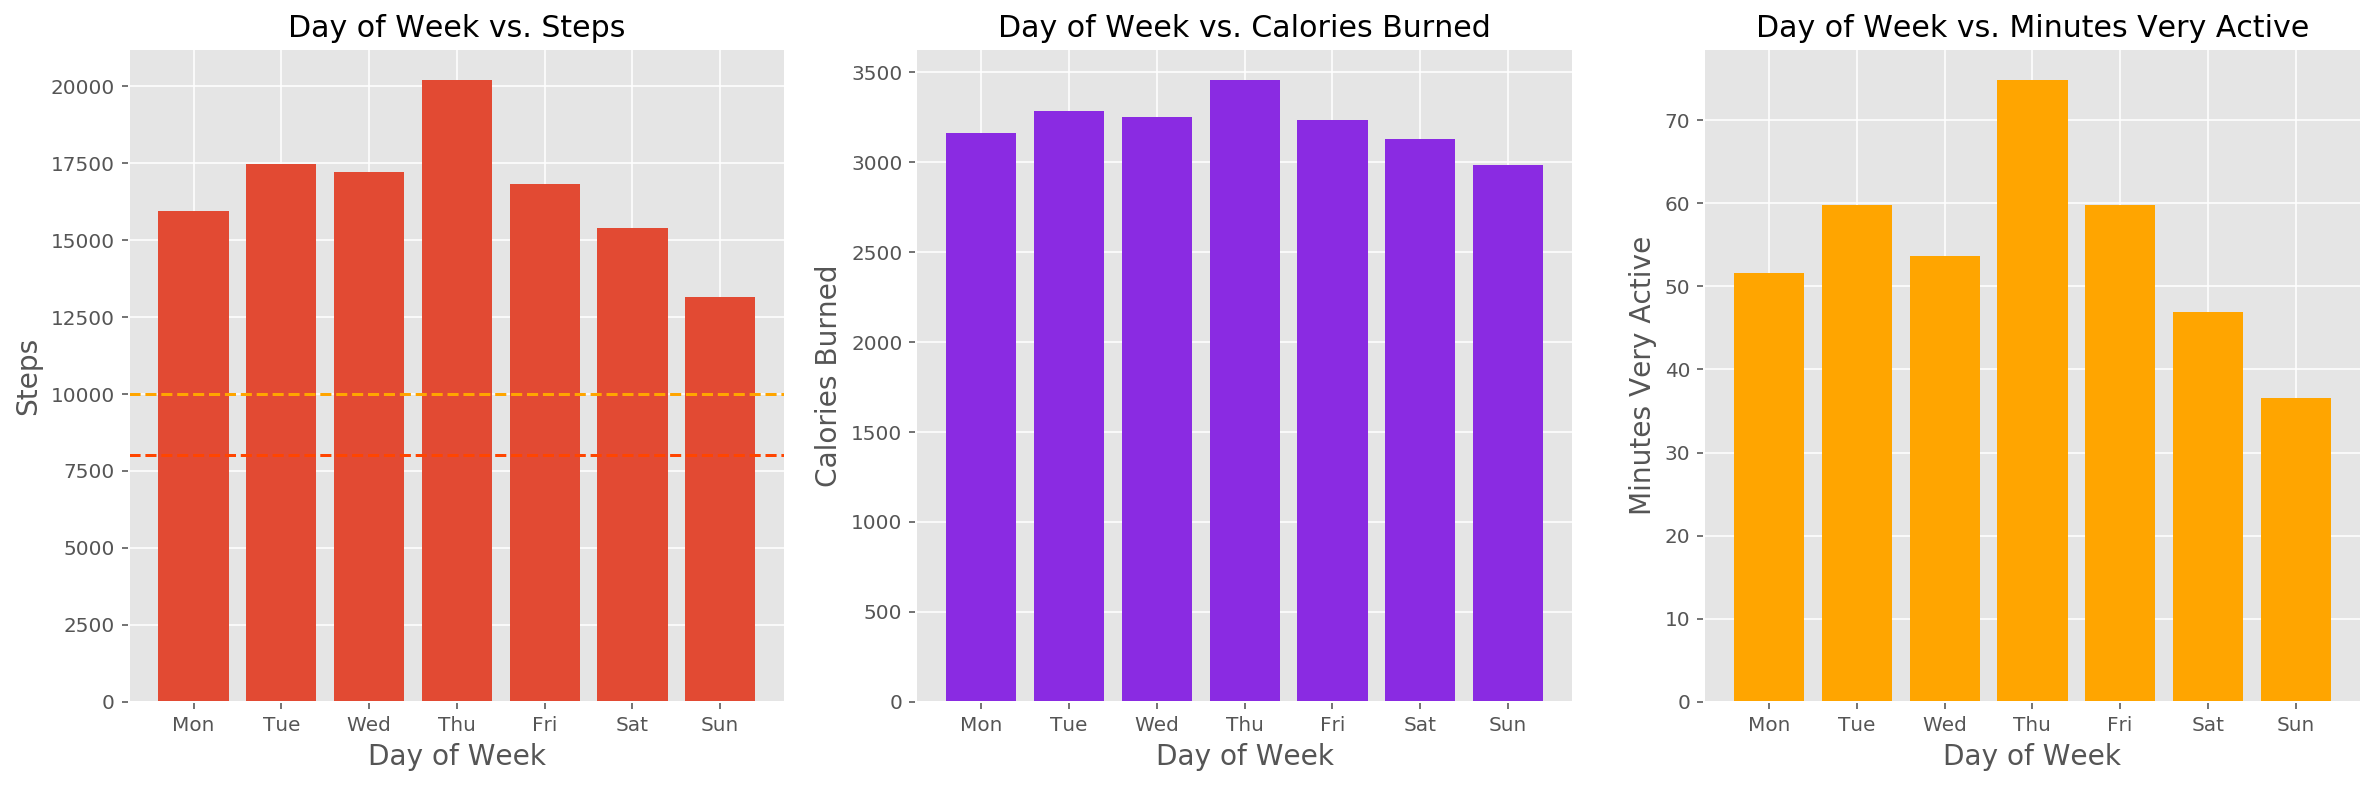

In [55]:
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(131)  
plt.bar(dayGroupedData.index, dayGroupedData['Steps'])
plt.title('Day of Week vs. Steps', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Steps', fontsize=14)
ax.axhline(8000, color="orangered", linestyle='--')
ax.axhline(10000, color="orange", linestyle='--')
ax.set_xticklabels(minDayCodes)

#############

ax2 = fig.add_subplot(132)
plt.bar(dayGroupedData.index, dayGroupedData['Calories Burned'], color='blueviolet')
plt.title('Day of Week vs. Calories Burned', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Calories Burned', fontsize=14)
ax2.set_xticklabels(minDayCodes)

#############

ax3 = fig.add_subplot(133)
ax3.set_xticklabels(minDayCodes)
plt.bar(dayGroupedData.index, dayGroupedData['Minutes Very Active'], color='orange')
plt.title('Day of Week vs. Minutes Very Active', fontsize=15)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Minutes Very Active', fontsize=14)
plt.show()

Text(0.5, 1.0, '"Sedentary minutes" per day')

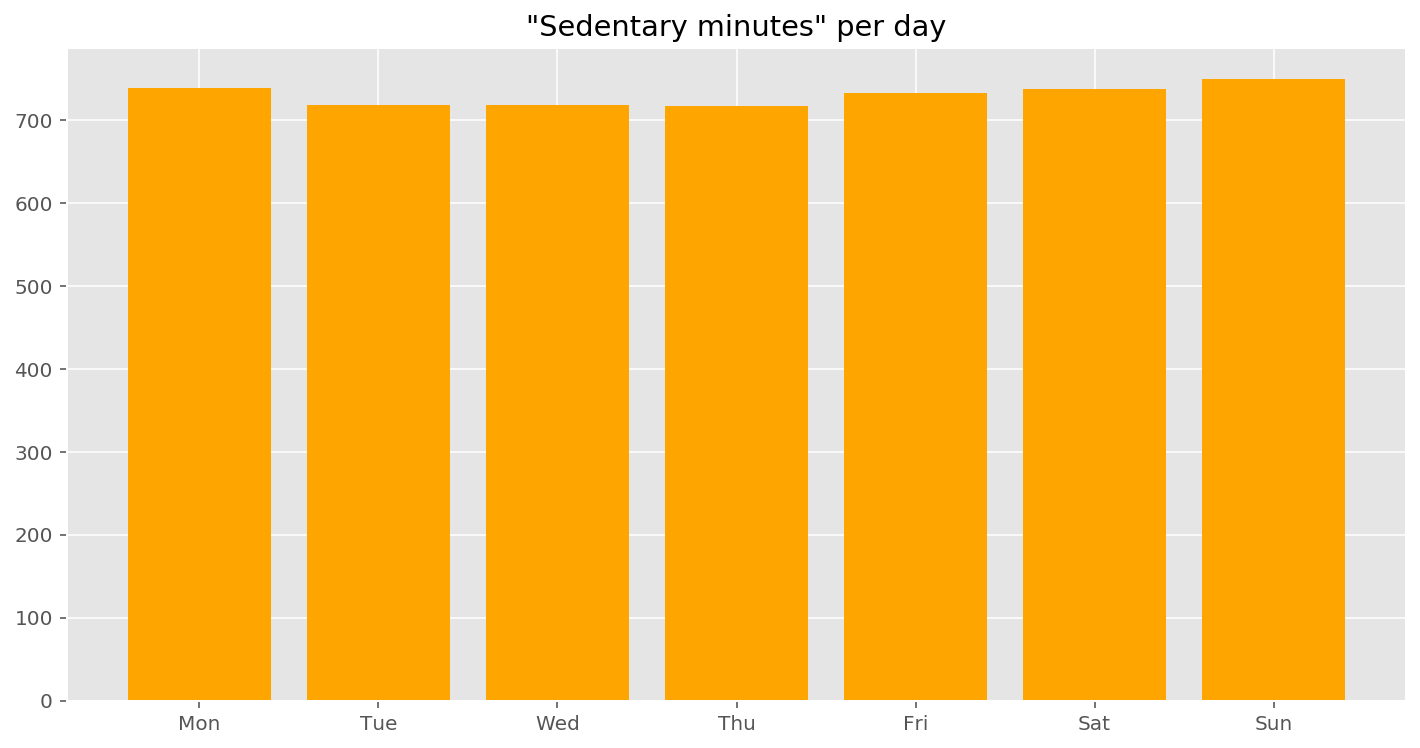

In [56]:
plt.bar(dayGroupedData.index, dayGroupedData['Minutes Sedentary'], color='orange', tick_label=minDayCodes[1:])
plt.title('"Sedentary minutes" per day')

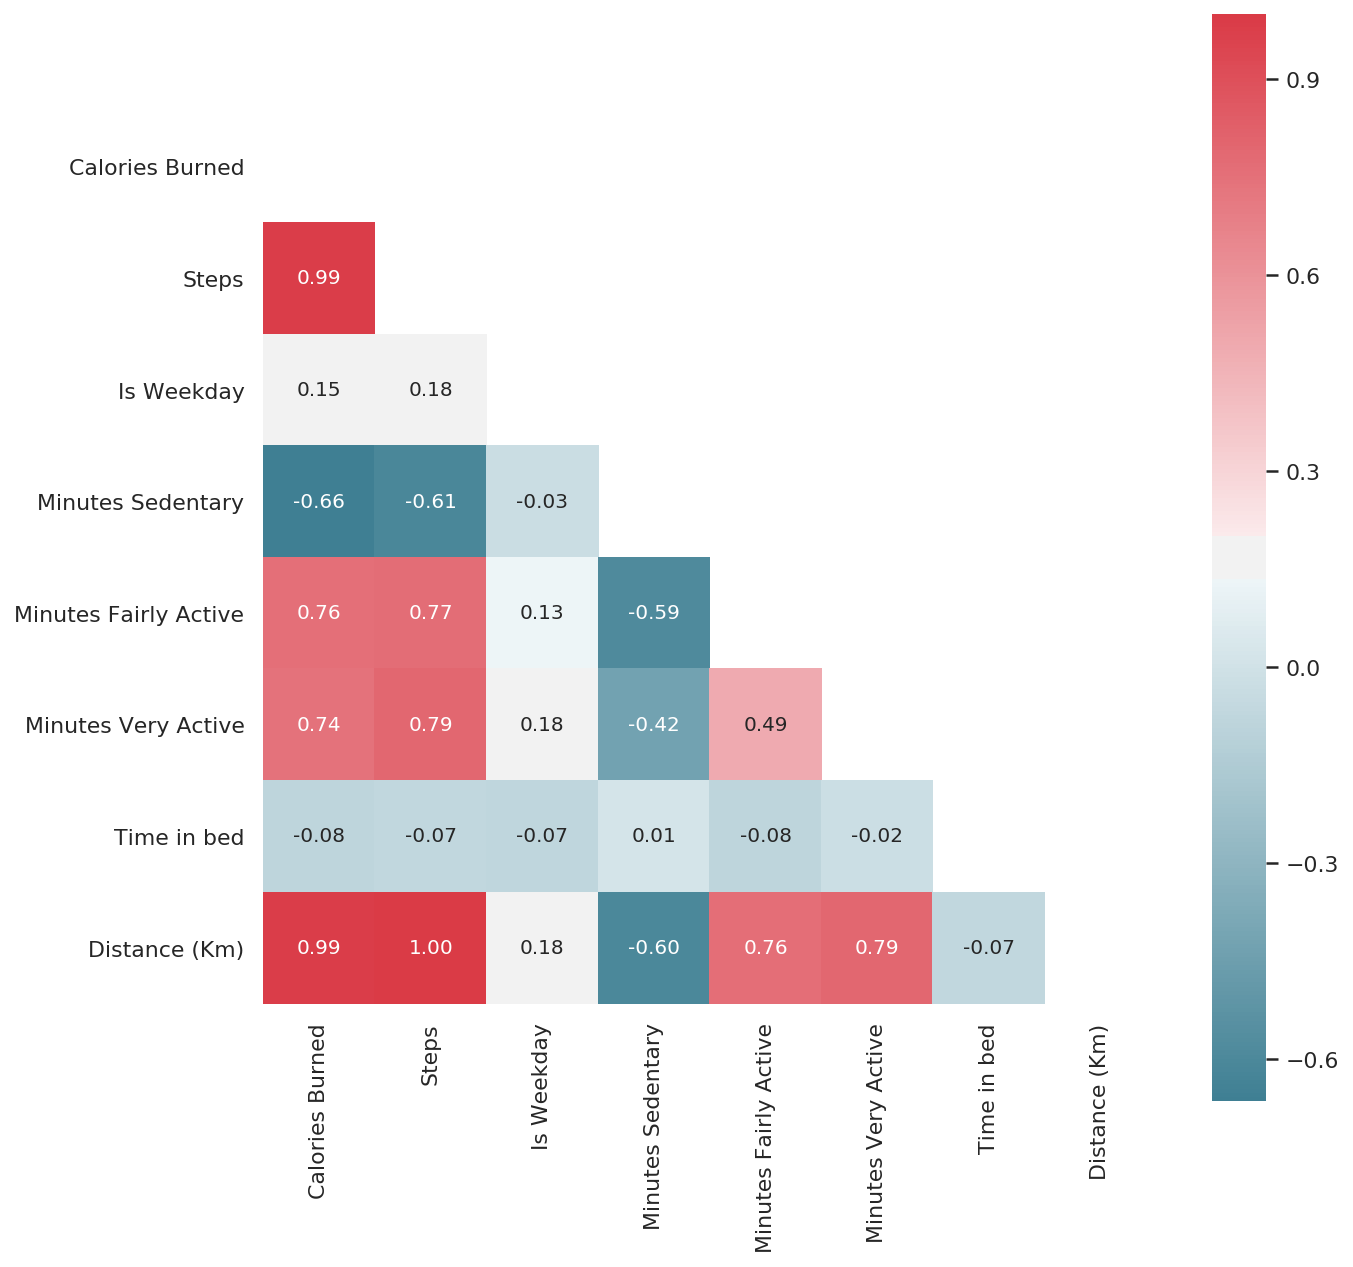

In [60]:
correlationOf = 'Calories Burned'
corrdf_calories = data[['Calories Burned','Steps', 'Is Weekday', 'Minutes Sedentary', 'Minutes Fairly Active', 'Minutes Very Active', 'Time in bed','Distance (Km)']]
plot_heatmap(corrdf_calories.corr(), correlationOf, '')

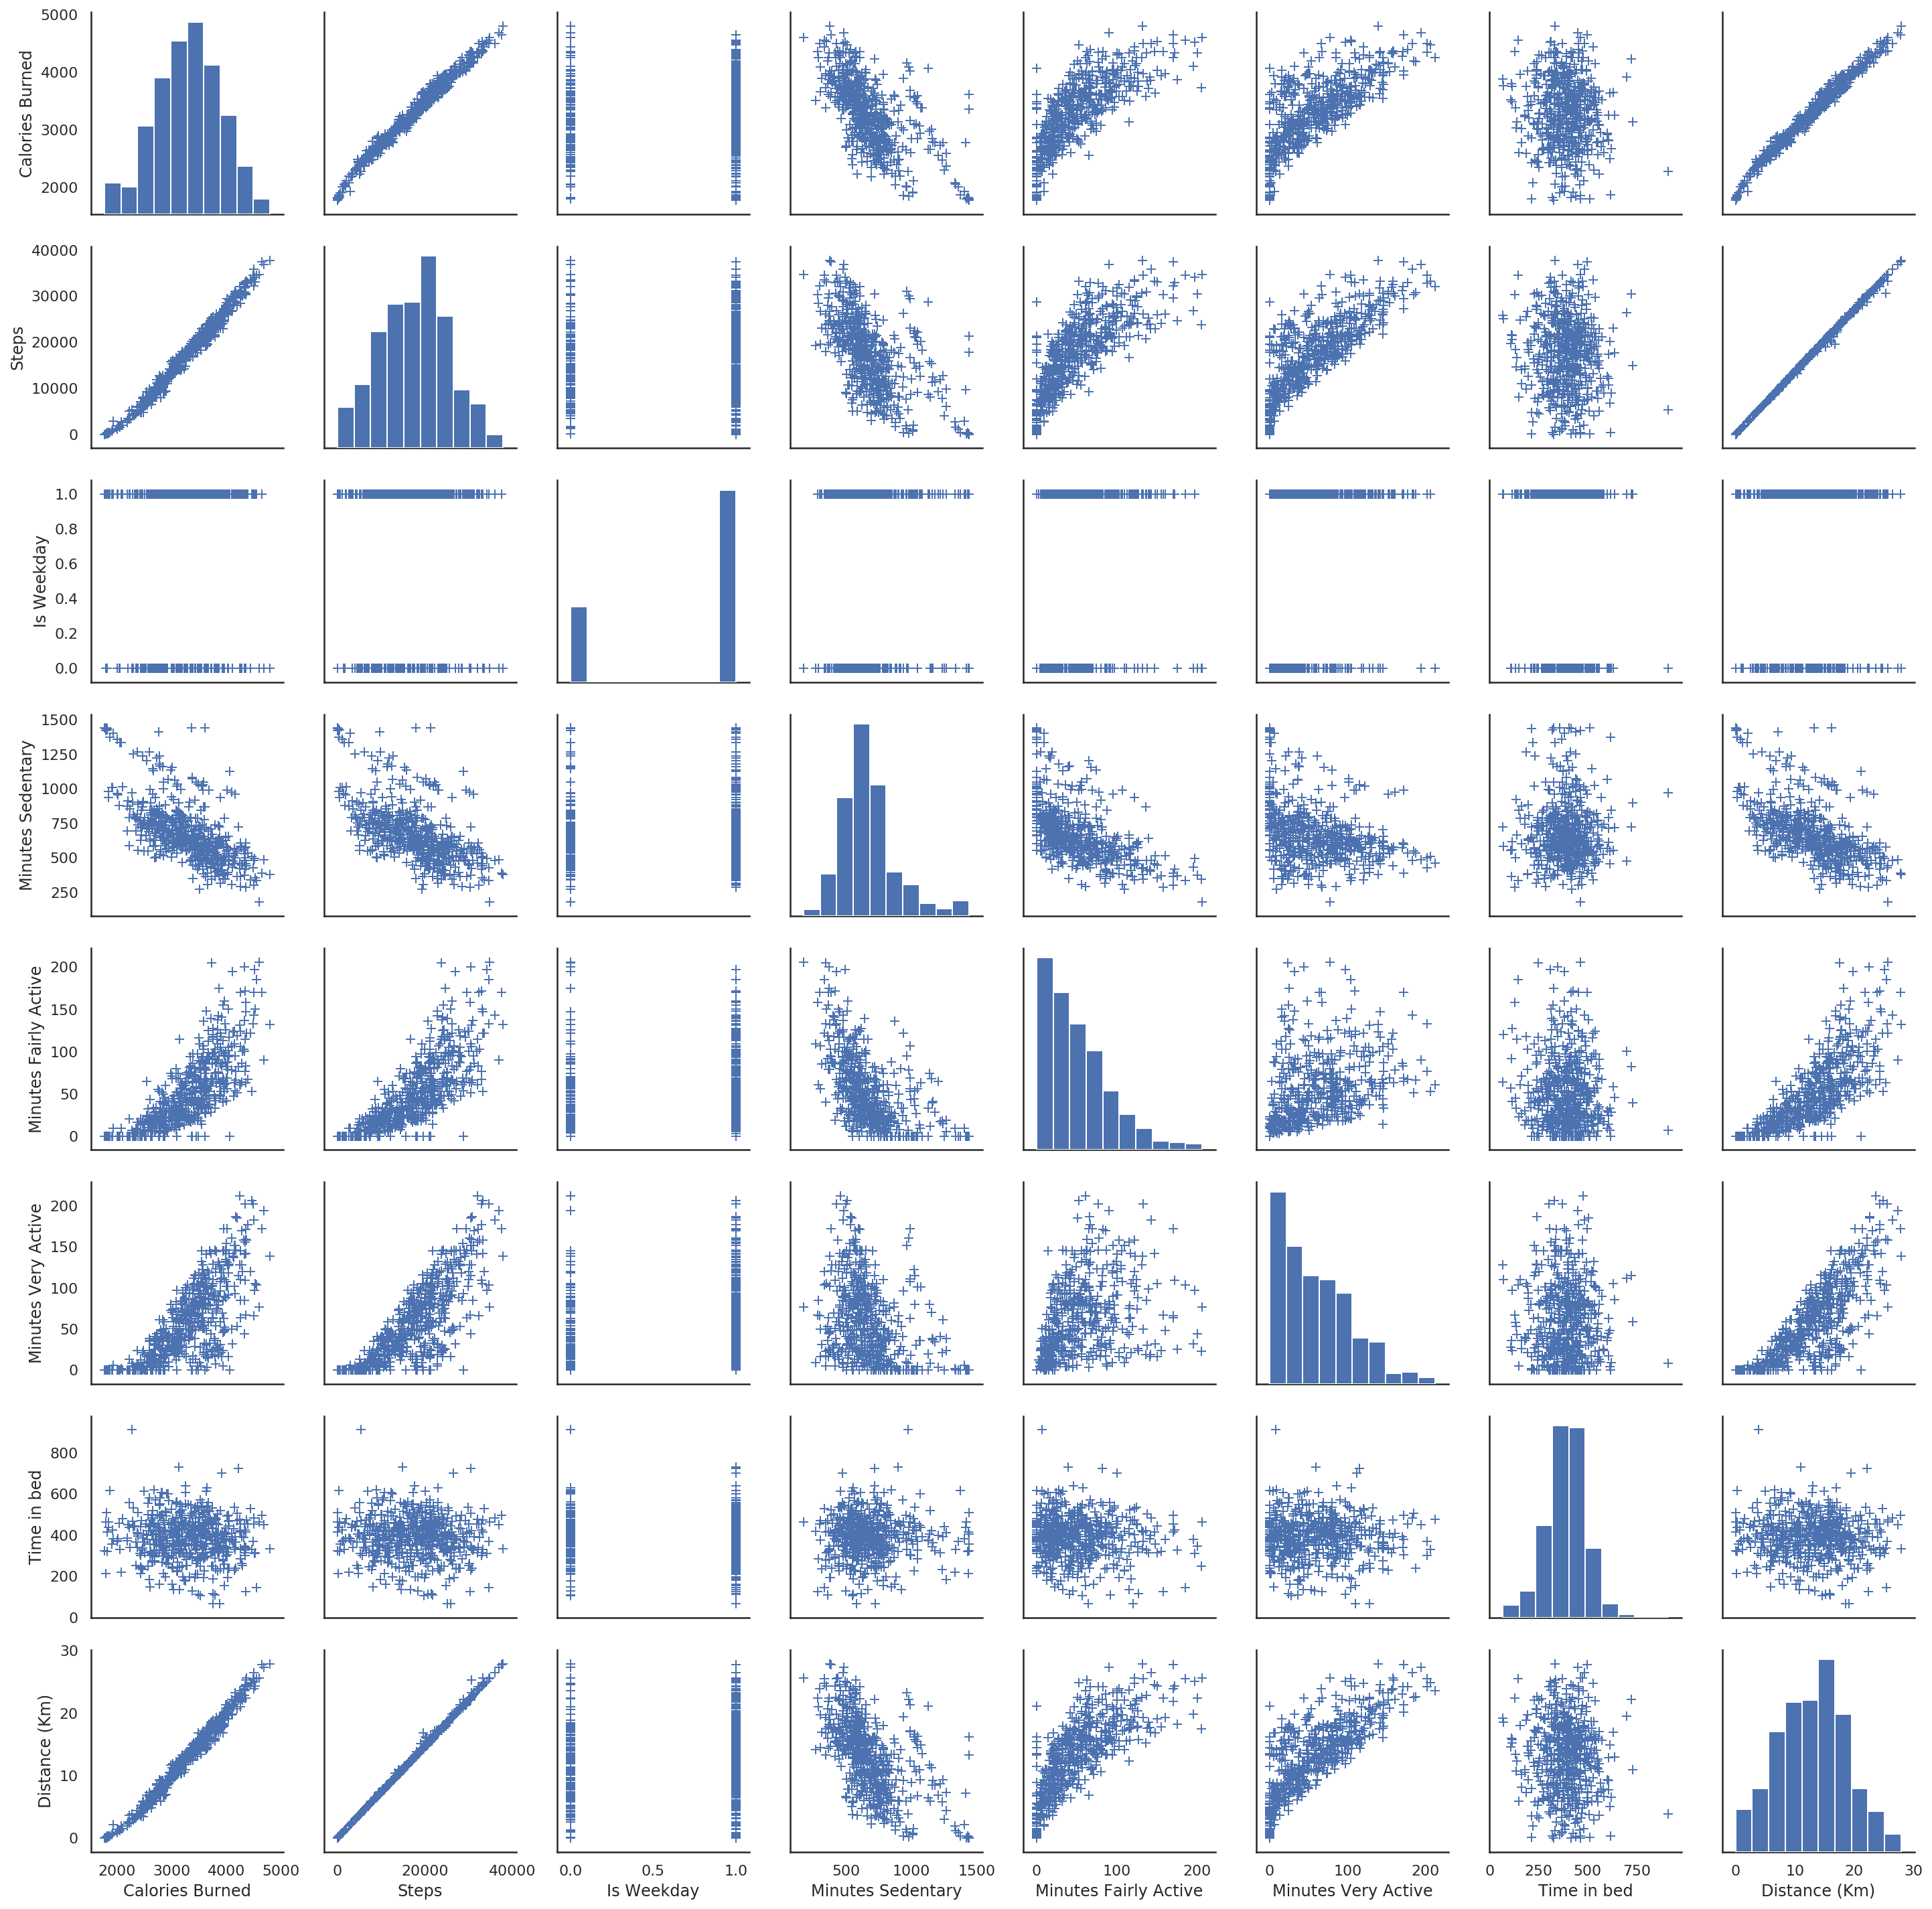

In [61]:

# Basic correlogram
sns.pairplot(corrdf_calories.dropna(), kind="scatter", markers="+", plot_kws=dict(s=50, edgecolor="b", linewidth=1))
plt.show()

,count,mean,std,min,25%,50%,75%,max
Time in bed,555.0,6.518709,1.732423,1.1,5.483333,6.6,7.558333,15.183333


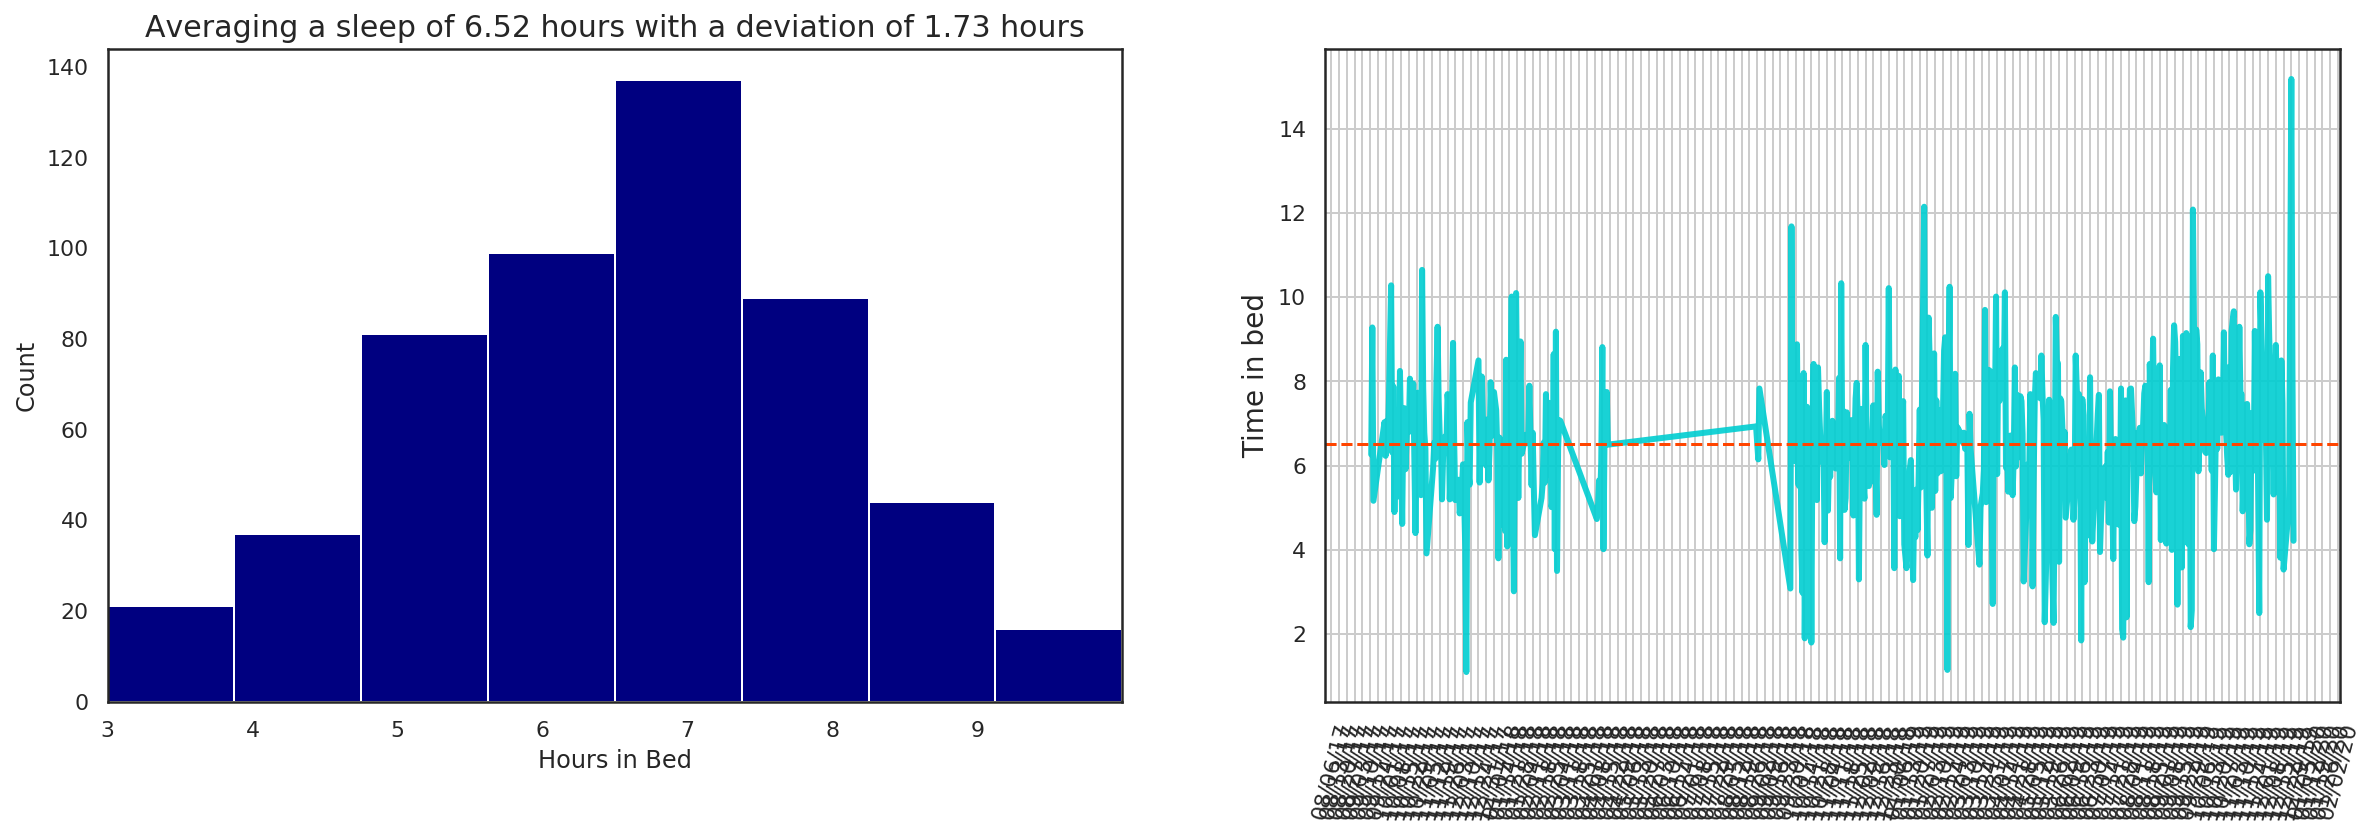

In [62]:
import matplotlib.dates as mdates

sleepDesc = pd.DataFrame(sleepData['Time in bed']/60).describe().transpose()
avgSleepHours = round(sleepDesc.at['Time in bed','mean'],2)
summary = 'Averaging a sleep of {} hours with a deviation of {} hours'.format(avgSleepHours, round(sleepDesc.at['Time in bed','std'],2))
hoursInBed = sleepData['Time in bed']/60

fig = plt.figure(figsize = (20,6))

ax = plt.subplot(121)  
plt.hist(hoursInBed, bins = 8, range = (3, 10), color="navy")
plt.xlim(3, 10)
plt.xticks(range(3, 10))
plt.xlabel('Hours in Bed')
plt.ylabel('Count');
plt.title(summary, fontsize=15)

#############

ax2 = fig.add_subplot(122)
plt.plot(sleepData['Date'],hoursInBed, linestyle='-', 
         markersize=10, color='darkturquoise', label='% Light', linewidth=3.0, alpha=0.9)
plt.ylabel('Time in bed', fontsize=14)
ax2.axhline(avgSleepHours, color="orangered", linestyle='--')
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%D'))
ax2.grid(True)
plt.xticks(rotation=75)
plt.plot()

sleepDesc

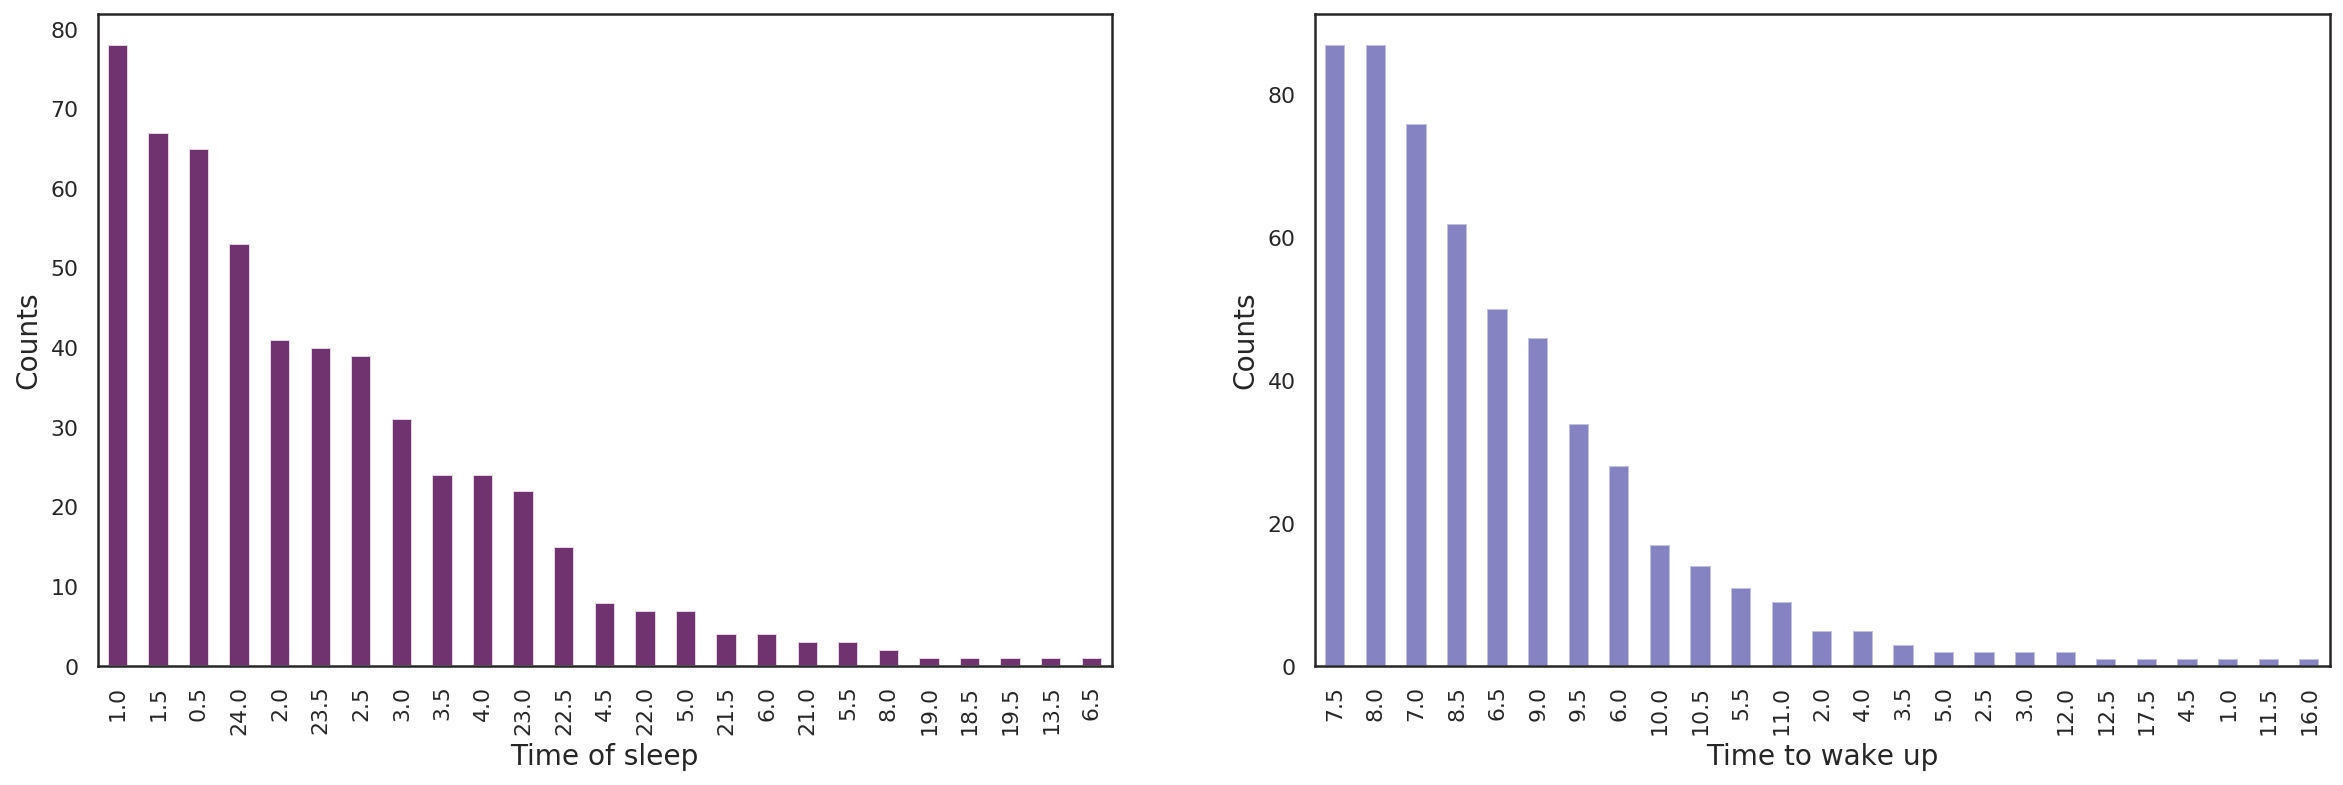

In [65]:
sleepBDF = sleepData[['Sleep Bucket', 'Awake Bucket', 'Time in bed']]
sleepBDF['Time in bed'] = sleepBDF['Time in bed']/60

#sleepBDF.groupby(['Sleep Bucket']).mean()
#sleepBDF.describe().transpose()

## plot the sleep and awake counts
fig = plt.figure(figsize = (20,6))

ax = plt.subplot(121)  
pd.value_counts(sleepData['Sleep Bucket']).plot.bar(cmap="BuPu_r", alpha=0.8)
plt.xlabel('Time of sleep', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=90)

#############

ax2 = fig.add_subplot(122)
pd.value_counts(sleepData['Awake Bucket']).plot.bar(cmap="plasma", alpha=0.5)
plt.xlabel('Time to wake up', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.xticks(rotation=90)
plt.show()

#https://www.sleepfoundation.org/sleep-tools-tips/healthy-sleep-tips

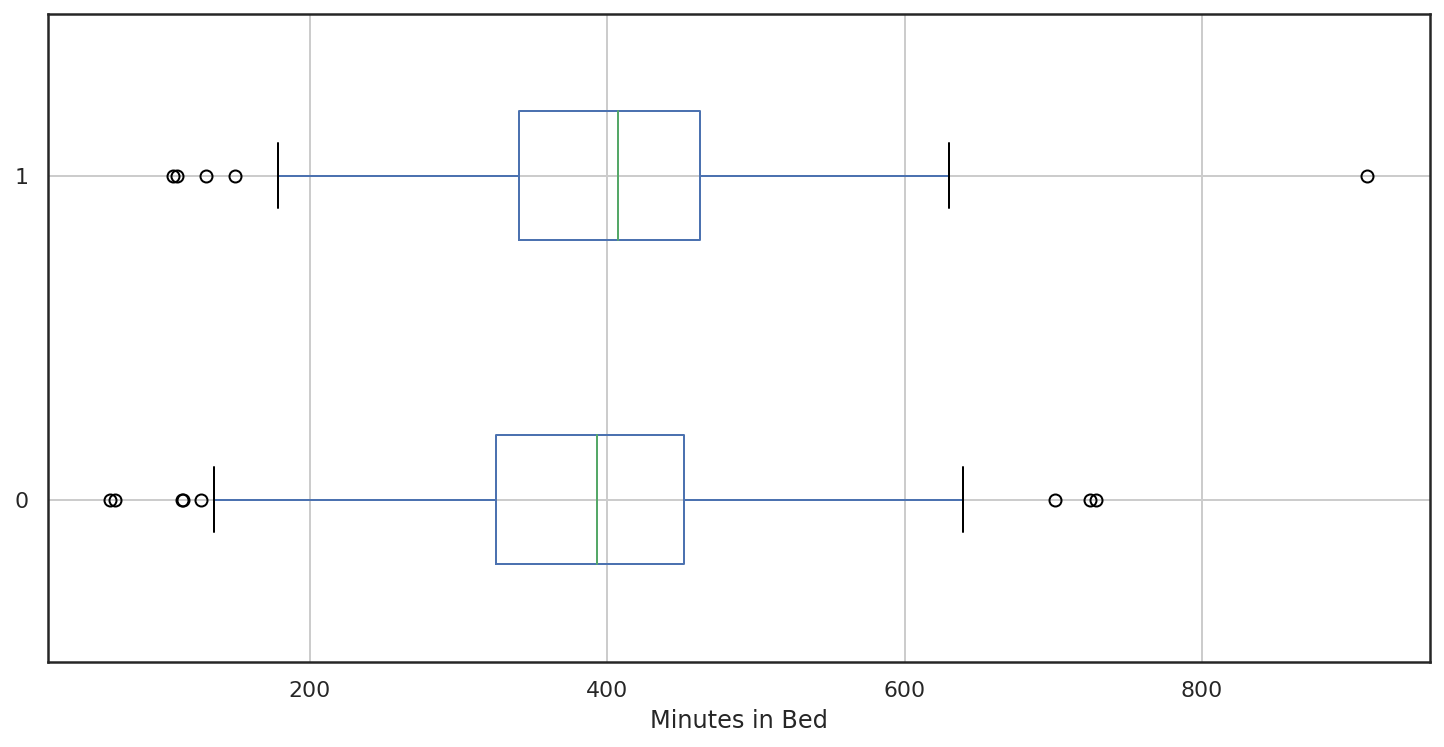

In [69]:
ax = sleepData.boxplot(column = 'Time in bed', by = 'Is Weekend', vert = False, widths = 0.4)
plt.xlabel('Minutes in Bed')
plt.suptitle('')
plt.title('');

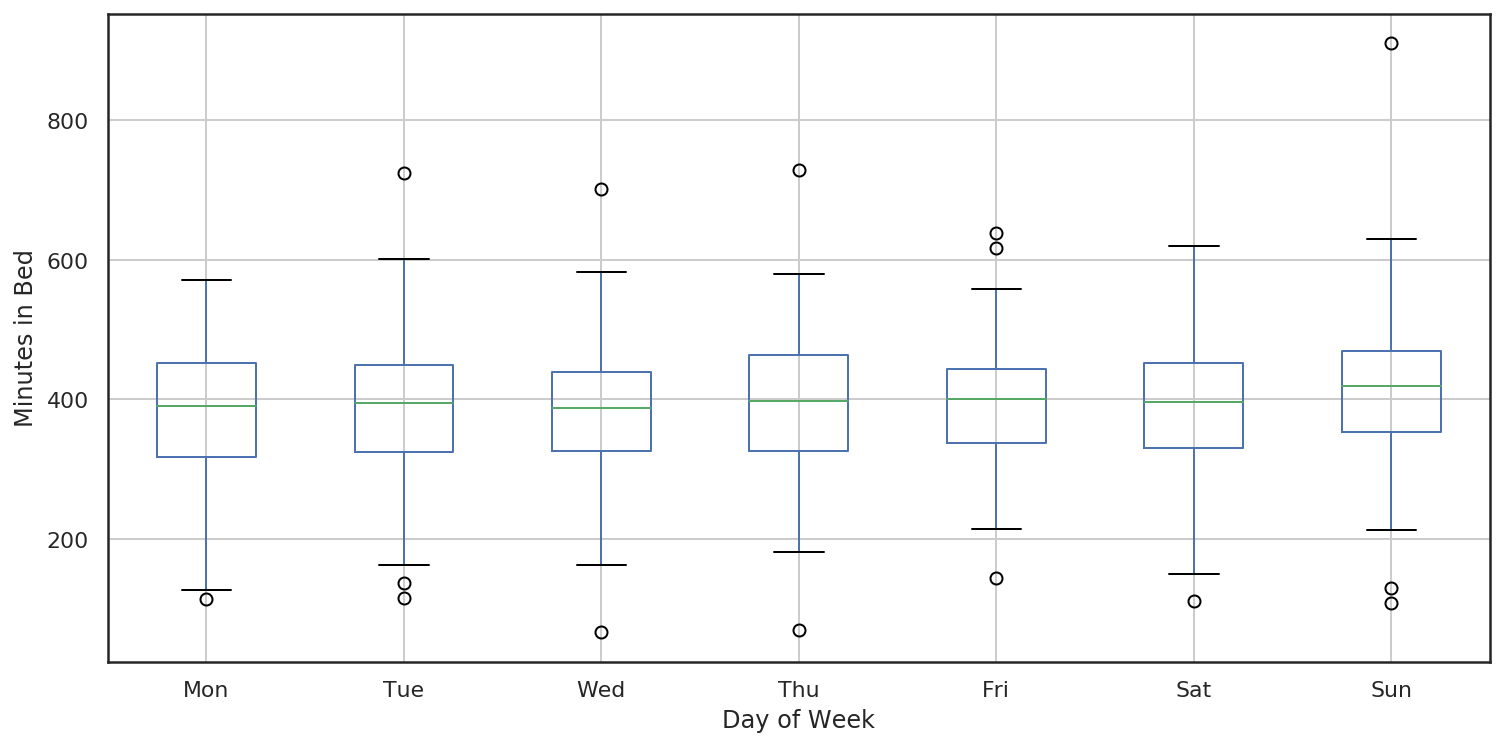

In [70]:
ax = sleepData.boxplot(column = 'Time in bed', by = 'Day of Week')
ax.set_xticklabels(minDayCodes[1:])
plt.ylabel('Minutes in Bed')
plt.suptitle('')
plt.title('');

In [75]:
sleepData['8 > Sleep > 7'] = sleepData['Time in bed'] > 7*60
sleepData['Sleep > 7'] = sleepData['Time in bed'] > 7*60
sleepData['Sleep > 8'] = sleepData['Time in bed'] > 8*60
sleepData['Active mins > 50'] = sleepData['Minutes Very Active'] > 50
sleepData['Active mins > 60'] = sleepData['Minutes Very Active'] > 60

sleepData['wee'] = np.logical_and(sleepData['Sleep Bucket'] <= 23, sleepData['Awake Bucket'] <= 7.5)
# slept before 11 and woke up by 6:30
#sleepData

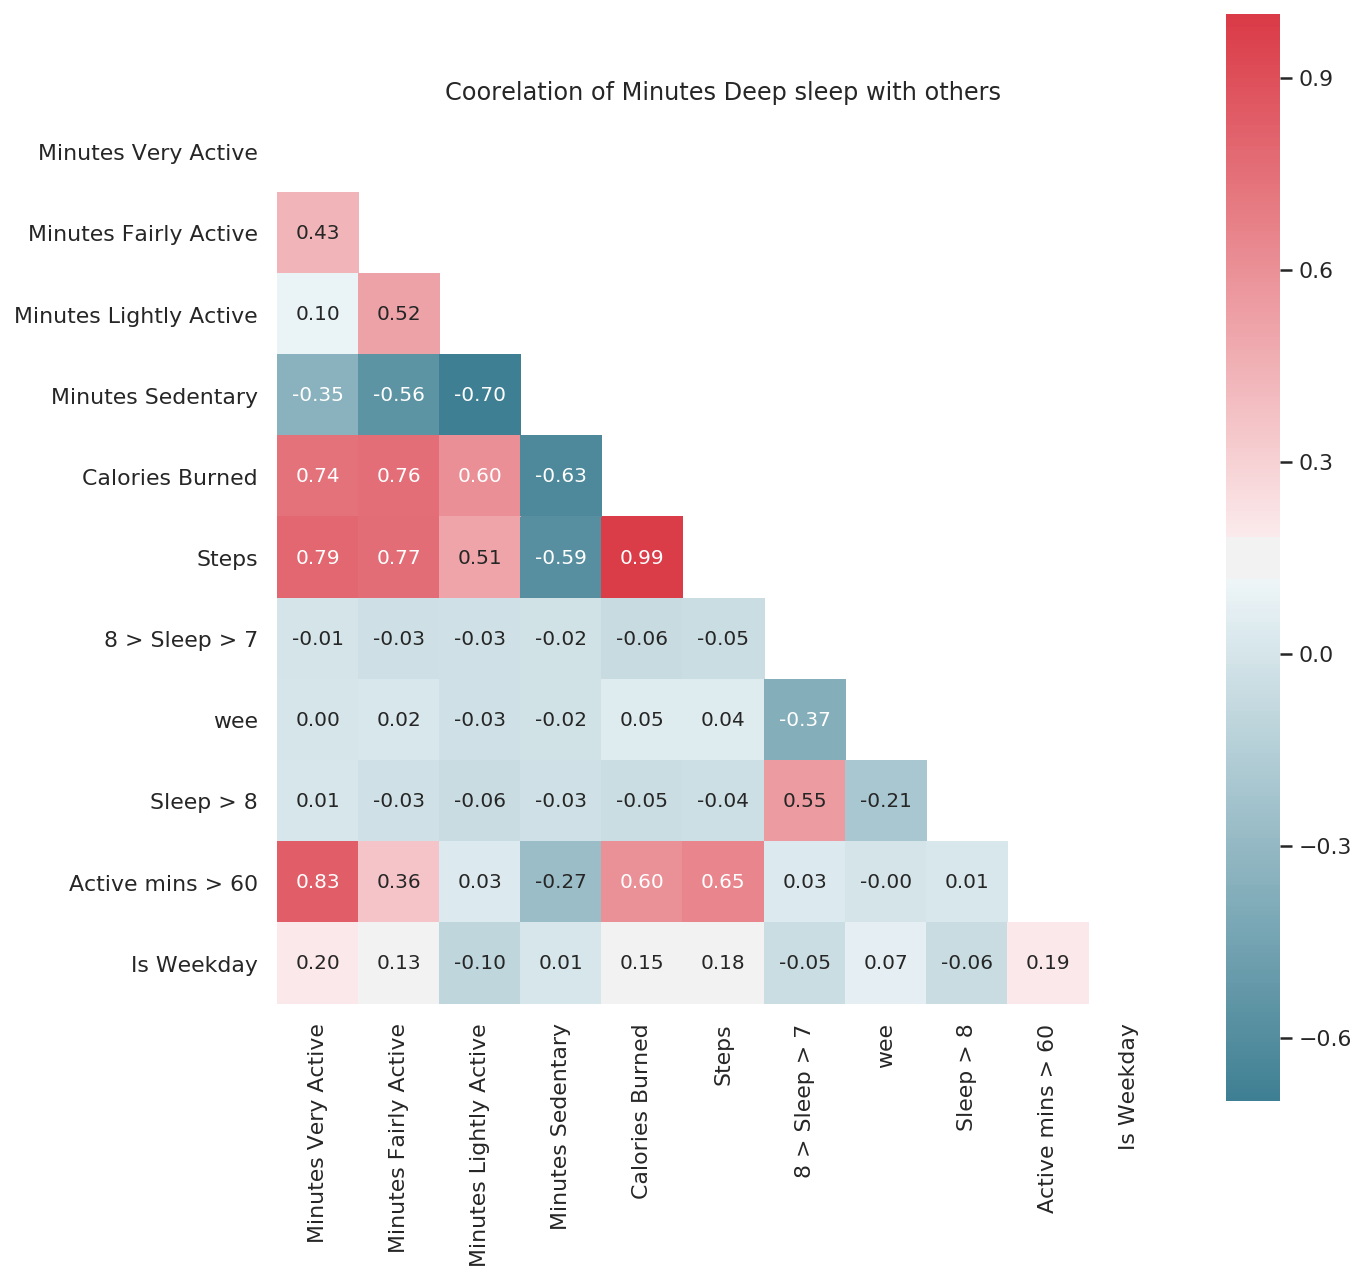

In [76]:
correlationOf="Minutes Deep sleep"
k = 15 #number of variables for heatmap
corrmat = sleepData[['Minutes Very Active', 'Minutes Fairly Active', 'Minutes Lightly Active', 'Minutes Sedentary', 'Calories Burned', 'Steps',
          '8 > Sleep > 7', 'wee', 'Sleep > 8', 'Active mins > 60', 'Is Weekday']].corr()
#corrmat = sleepData.drop(['% Restorative sleep', 'Minutes Light sleep', 'Minutes REM sleep', '% Deep sleep', '% Light sleep', '% REM sleep', 'REM sleep count', 'Deep sleep count', 'Light sleep count'], axis=1).corr().abs()
#cols = corrmat.nlargest(k, correlationOf)[correlationOf].index
#corrdf_sleep = sleepData[cols]

plot_heatmap(corrmat, correlationOf, 'Coorelation of {} with others'.format(correlationOf), darkTheme=False)

In [78]:
sleepData = sleepData.dropna(how='all', axis=1)
sleepData.head()


,Unnamed: 0,Active Score,Activity Calories,Calories BMR,Calories Burned,Date,Day of Week,Distance (Km),Is Weekday,Is Weekend,Minutes Fairly Active,Minutes Lightly Active,Minutes Sedentary,Minutes Very Active,Minutes to fall asleep,Sleep Efficiency,Sleep End time,Sleep Start time,Steps,Time in bed,Day Label,Active exercise,Sleep Bucket,Awake Bucket,8 > Sleep > 7,Sleep > 7,Sleep > 8,Active mins > 50,Active mins > 60,wee
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-09-11,13,-1,1213,1769,2664,2017-09-11,1,6.40,1,0,33,240,1130,20,0.0,99.0,2017-09-12T05:59:30.000,2017-09-11T23:43:00.000,8667,376.0,Mon,False,24.0,6.0,False,False,False,False,False,False
2017-09-12,14,-1,2330,1771,3564,2017-09-12,2,15.95,1,0,32,364,473,69,0.0,90.0,2017-09-13T06:54:30.000,2017-09-12T21:37:00.000,20404,557.0,Tue,True,22.0,7.0,True,True,True,True,True,True
2017-09-13,15,-1,951,1772,2429,2017-09-13,3,3.80,1,0,0,260,766,0,0.0,91.0,2017-09-14T07:14:00.000,2017-09-14T02:03:30.000,5155,310.0,Wed,False,2.5,7.5,False,False,False,False,False,True
2017-09-23,25,-1,1553,1776,3008,2017-09-23,6,11.27,0,1,68,146,1156,70,0.0,95.0,2017-09-24T08:46:30.000,2017-09-24T01:44:00.000,15285,422.0,Sat,True,2.0,9.0,True,True,False,True,True,False
2017-09-24,26,-1,1593,1776,2900,2017-09-24,7,6.99,0,1,17,373,608,20,0.0,91.0,2017-09-25T07:09:30.000,2017-09-25T00:55:00.000,9364,374.0,Sun,False,1.0,7.5,False,False,False,False,False,True


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
y = sleepData['Time in bed']
X = sleepData[['Calories Burned', 'Steps', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active','Sleep Bucket', 'Day of Week']]
X.fillna(X.mean(), inplace=True)

#label encode the category values
X = pd.get_dummies(X, columns=['Day of Week', 'Sleep Bucket'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(y.shape))

X shape: (555, 38)
Y shape: (555,)


In [81]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
lr_y_pred = regr.predict(X_test)
                        
print("Mean squared error: %.2f"% mean_squared_error(y_test, lr_y_pred))
#coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regr.coef_))], axis = 1)
#coefficients

Mean squared error: 6940.78


In [83]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbR = XGBRegressor()
parameters = {'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07, 0.1],
              'max_depth': [3, 4, 5, 6],
              'min_child_weight': [1, 5, 10],
              'silent': [1],
              'n_estimators': [100, 300, 500],
              'seed': [1212]
             }

xgb_grid = GridSearchCV(xgbR, parameters, n_jobs = 5, verbose=True)
xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

y_pred = xgb_grid.predict(X_test)
print ("RMSE : ",mean_squared_error(y_test,y_pred))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.4s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   22.5s


0.12157835431630322
{'learning_rate': 0.07, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'reg:linear', 'seed': 1212, 'silent': 1}
RMSE :  6936.450409359703


[Parallel(n_jobs=5)]: Done 432 out of 432 | elapsed:   47.1s finished
/home/sam/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


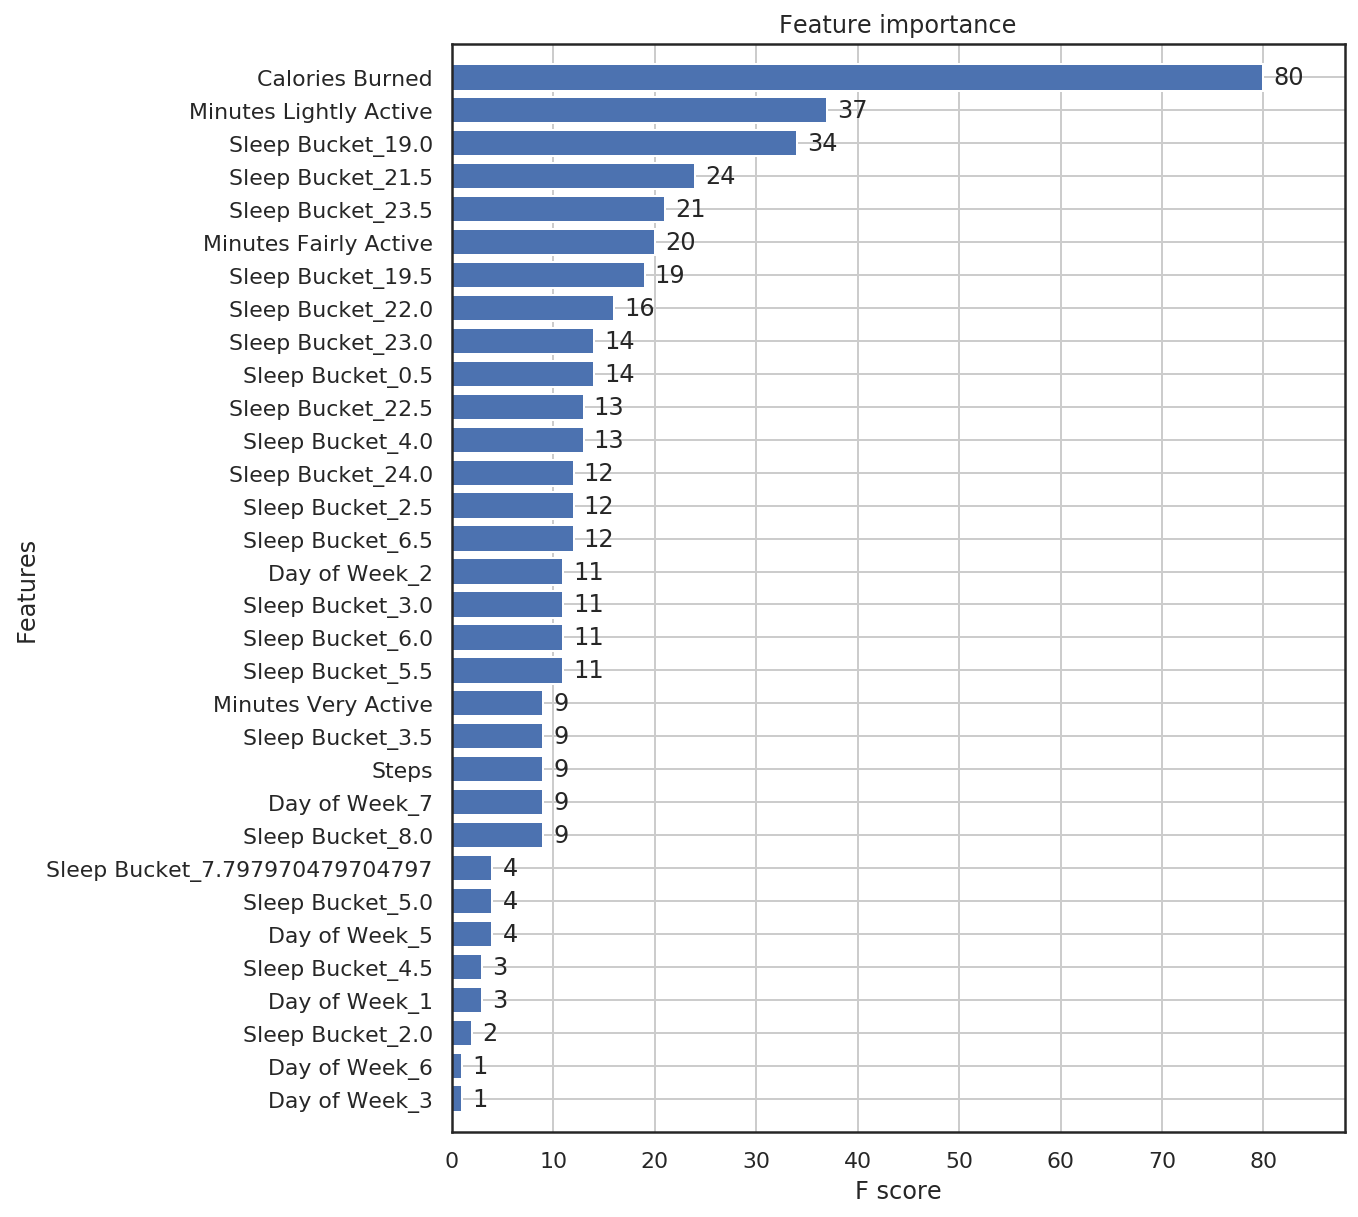

In [84]:
fig, ax = plt.subplots(figsize=(8,10))
xgb.plot_importance(xgb_grid.best_estimator_, height=0.8, ax=ax)
plt.show()
#y_pred = xgb_grid.predict(X_test)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import graphviz 
from IPython.display import Image  
import pydotplus



def trainAndPredict(classifier):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    print ("Accuracy : ",accuracy_score(y_test,y_pred)*100)
    print("Report : ",classification_report(y_test, y_pred))
    #print("Confusion Matrix: ",confusion_matrix(y_test, y_pred))
    return

def plotGraph(classifier):
    dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=X.columns.values,  
                         class_names=['Yes', 'No'],                                
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)  

    # Show graph
    Image(graph.create_png())
    graph.write_png("iris.png")

    return graph

In [99]:
X = sleepData[['Day of Week', 'Calories Burned', 'Steps', 'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active', 'Time in bed']]

X = sleepData[['Calories Burned', 'Steps', 'Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active','Sleep Bucket', 'Day of Week']]
X.fillna(X.mean(), inplace=True)

Y = sleepData['Time in bed'] > 360

print('X shape: {}'.format(X.shape))
print('Y shape: {}'.format(Y.shape))

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)
print('X_train shape: {}. X_test shape: {}'.format(X_train.shape, X_test.shape))

X shape: (555, 7)
Y shape: (555,)
X_train shape: (388, 7). X_test shape: (167, 7)


In [100]:
from sklearn import tree
clf_gini_default = DecisionTreeClassifier(criterion = "gini")
trainAndPredict(clf_gini_default)
plotGraph(clf_gini_default)


Accuracy :  64.67065868263472
Report :                precision    recall  f1-score   support

       False       0.54      0.57      0.56        65
        True       0.72      0.70      0.71       102

    accuracy                           0.65       167
   macro avg       0.63      0.63      0.63       167
weighted avg       0.65      0.65      0.65       167

